## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

We need some library to read the images, I've chosen the pillow library which comes with Anaconda, if you need to 

pip install Pillow

should install it for you

In [2]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
##Printing Examples
def printexamples(X, y, examples_per_class = 10, number_of_classes = 10, mult = 1.0):
    examples_per_class = 10
    pos = 0
    data = pd.DataFrame(y, columns=['yvalue'])
    for cls in range(number_of_classes):
        this_class = data[data['yvalue'] == cls]
        idxs = this_class.sample(examples_per_class).index
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow((X[idx]*mult).reshape(20,20).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
    plt.show()

In [15]:
##PART 1 Preparing The Data

# get the list of all the files in digits.zip/data and create filelist
filelist = sorted(glob.glob('data/*/*.png'))

#create a file list
X = np.array([np.array(Image.open(f).convert('L').resize((20, 20))).flatten() for f in filelist]) / 255.0 # normalize pixels

# Step 3: Extract class labels from filenames
# Assuming filenames are like 'category_0_image1.jpg', 'category_1_image2.jpg', etc.
#y = np.array([int(os.path.basename(f).split('_')[1]) for f in filelist])

y = np.array([int(os.path.basename(os.path.dirname(f))) for f in filelist])

# Step 4: Ensure X and y are properly structured
print("Shape of X:", X.shape)  # Should be (5000, 400)
print("Shape of y:", y.shape)  # Should be (5000,)
print("First 10 labels:", y[:10])  # Check labels

a = [s.split() for s in " ".join(filelist).split("\\") if s]
#a = np.array(filename.split('\\')[1] for filename in filelist, dtype=int)
#print(a.shape)

# Step 5: Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 6: Print shapes of datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Shape of X: (5000, 400)
Shape of y: (5000,)
First 10 labels: [0 0 0 0 0 0 0 0 0 0]
Training set size: (3000, 400) (3000,)
Validation set size: (1000, 400) (1000,)
Test set size: (1000, 400) (1000,)


In [5]:
## PART 2 K-Nearest Neighbors
# Step 1: Train k-NN model with k=5

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Step 2: Evaluate the model
train_score = knn.score(X_train, y_train)
val_score = knn.score(X_val, y_val)
print(f"Training Accuracy: {train_score:.4f}")
print(f"Validation Accuracy: {val_score:.4f}")

# Step 3: Count incorrect predictions on the test set
y_pred = knn.predict(X_test)
incorrect_predictions = (y_pred != y_test).sum()
print(f"Incorrect predictions: {incorrect_predictions}")


Training Accuracy: 0.9570
Validation Accuracy: 0.9370
Incorrect predictions: 69


In [6]:
# Step 4: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       121
           1       0.89      0.99      0.94        94
           2       0.99      0.90      0.94       101
           3       0.91      0.89      0.90       102
           4       0.93      0.94      0.93        95
           5       0.93      0.92      0.93       103
           6       0.96      0.98      0.97        91
           7       0.94      0.91      0.92        98
           8       0.91      0.88      0.90       104
           9       0.89      0.89      0.89        91

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [7]:
# Step 5: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[121   0   0   0   0   0   0   0   0   0]
 [  0  93   0   0   0   1   0   0   0   0]
 [  1   1  91   1   0   1   0   2   4   0]
 [  1   1   0  91   1   1   1   0   5   1]
 [  0   3   1   0  89   0   1   0   0   1]
 [  0   1   0   4   0  95   1   0   0   2]
 [  2   0   0   0   0   0  89   0   0   0]
 [  0   2   0   0   2   0   1  89   0   4]
 [  0   2   0   2   2   4   0   0  92   2]
 [  1   1   0   2   2   0   0   4   0  81]]


In [8]:
# Step 6: k-Fold Cross Validation to find best k
k_values = list(range(1, 21))
k_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in k_values]
best_k = k_values[np.argmax(k_scores)]
print(f"Best k found: {best_k}")

# Train final model with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
final_val_score = knn_best.score(X_val, y_val)
print(f"Final validation accuracy with k={best_k}: {final_val_score:.4f}")

Best k found: 4
Final validation accuracy with k=4: 0.9350


In [9]:
# Final classification report
y_pred_best = knn_best.predict(X_test)
print("Final Classification Report:")
print(classification_report(y_test, y_pred_best))

Final Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       121
           1       0.90      0.99      0.94        94
           2       0.98      0.91      0.94       101
           3       0.93      0.91      0.92       102
           4       0.90      0.94      0.92        95
           5       0.93      0.92      0.93       103
           6       0.98      0.98      0.98        91
           7       0.90      0.92      0.91        98
           8       0.94      0.88      0.91       104
           9       0.88      0.85      0.86        91

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [10]:
## PART 3 Logistical Regression

# Step 1: Use kFold Cross Validation to choose the best regularization strength
c_values = np.logspace(-4, 4, 10)
c_scores = [cross_val_score(LogisticRegression(C=c, max_iter=1000), X_train, y_train, cv=5).mean() for c in c_values]
best_c = c_values[np.argmax(c_scores)]
print(f"Best C found: {best_c}")

Best C found: 0.3593813663804626


In [11]:
# Step 2: Train the best logistic regression model
log_reg = LogisticRegression(C=best_c, max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 3: Evaluate logistic regression model
y_pred_log = log_reg.predict(X_test)
log_val_score = log_reg.score(X_val, y_val)
print(f"Validation Accuracy for Logistic Regression: {log_val_score:.4f}")

Validation Accuracy for Logistic Regression: 0.8960


In [12]:
# Step 4: Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       121
           1       0.93      0.96      0.94        94
           2       0.89      0.85      0.87       101
           3       0.88      0.82      0.85       102
           4       0.89      0.91      0.90        95
           5       0.87      0.86      0.87       103
           6       0.94      0.98      0.96        91
           7       0.91      0.87      0.89        98
           8       0.87      0.87      0.87       104
           9       0.85      0.88      0.86        91

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [13]:
# Step 5: Print confusion matrix
log_conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Logistic Regression Confusion Matrix:")
print(log_conf_matrix)

Logistic Regression Confusion Matrix:
[[118   0   0   0   0   2   1   0   0   0]
 [  0  90   0   1   0   0   0   0   2   1]
 [  1   0  86   2   2   1   1   3   4   1]
 [  0   1   6  84   0   3   1   0   7   0]
 [  2   1   0   0  86   0   2   1   1   2]
 [  1   2   0   5   5  89   1   0   0   0]
 [  2   0   0   0   0   0  89   0   0   0]
 [  0   2   1   1   0   1   0  85   0   8]
 [  0   1   4   2   1   4   0   0  90   2]
 [  2   0   0   0   3   2   0   4   0  80]]


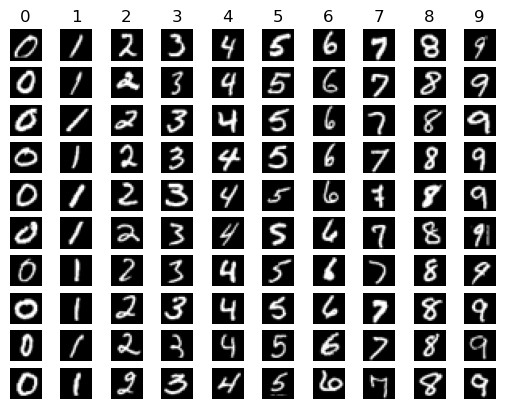

In [14]:
printexamples(X, y, mult = 255)